# Start from Files

In [1]:
from sklearn.datasets import fetch_20newsgroups

newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

In [2]:
import nltk
nltk.download('reuters')
from nltk.corpus import reuters

train_docs = [d for d in reuters.fileids() if d.startswith("train")]
test_docs = [d for d in reuters.fileids() if d.startswith("test")]

train_data = [reuters.raw(doc_id) for doc_id in train_docs]
train_labels = [reuters.categories(doc_id)[0] for doc_id in train_docs]
test_data = [reuters.raw(doc_id) for doc_id in test_docs]
test_labels = [reuters.categories(doc_id)[0] for doc_id in test_docs]

[nltk_data] Downloading package reuters to
[nltk_data]     /home/hassan_ibrar/nltk_data...


# Task 1

In [3]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split

In [11]:
# Download the required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/hassan_ibrar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/hassan_ibrar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/hassan_ibrar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/hassan_ibrar/nltk_data...


True

# Preprocessing Function

In [5]:
def preprocess_text(text):
    words = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    porter = PorterStemmer()
    words = [porter.stem(word) for word in words]
    lemmatizer = nltk.WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

In [6]:
#Helper Function from File
train_docs = [d for d in reuters.fileids() if d.startswith("train")]
test_docs = [d for d in reuters.fileids() if d.startswith("test")]

# Preprocessing and Loading the dataset

In [12]:
train_data = []
train_labels = []
for doc_id in train_docs:
    train_data.append(preprocess_text(reuters.raw(doc_id)))
    train_labels.append(reuters.categories(doc_id)[0])

In [13]:
test_data = []
test_labels = []
for doc_id in test_docs:
    test_data.append(preprocess_text(reuters.raw(doc_id)))
    test_labels.append(reuters.categories(doc_id)[0])

In [14]:
# Split the dataset into training and testing sets in a ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.2)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X_train)
X_train_bow = vectorizer.transform(X_train)
X_test_bow = vectorizer.transform(X_test)

## Naive  Bayes,  Logistic  Regression,  SVM,  and  Random  Forest  models

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [17]:
nb = MultinomialNB()
lr = LogisticRegression()
svm = LinearSVC()
rf = RandomForestClassifier()

In [18]:
lr = LogisticRegression(max_iter=1000)

In [19]:
svm = LinearSVC(max_iter=50000)

In [20]:
nb.fit(X_train_bow, y_train)

MultinomialNB()

In [21]:
lr.fit(X_train_bow, y_train)

LogisticRegression(max_iter=1000)

In [22]:
rf.fit(X_train_bow, y_train)

RandomForestClassifier()

In [23]:
svm.fit(X_train_bow, y_train)

LinearSVC(max_iter=50000)

In [24]:
nb_pred = nb.predict(X_test_bow)

In [25]:
lr_pred = lr.predict(X_test_bow)

In [26]:
svm_pred = svm.predict(X_test_bow)

In [27]:
rf_pred = rf.predict(X_test_bow)

# Evaluation

In [28]:
nb_accuracy = accuracy_score(y_test, nb_pred)
lr_accuracy = accuracy_score(y_test, lr_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

In [29]:
nb_precision = precision_score(y_test, nb_pred, average='weighted', zero_division=1)
lr_precision = precision_score(y_test, lr_pred, average='weighted', zero_division=1)
svm_precision = precision_score(y_test, svm_pred, average='weighted', zero_division=1)
rf_precision = precision_score(y_test, rf_pred, average='weighted', zero_division=1)

In [30]:
nb_recall = recall_score(y_test, nb_pred, average='weighted', zero_division=1)
lr_recall = recall_score(y_test, lr_pred, average='weighted', zero_division=1)
svm_recall = recall_score(y_test, svm_pred, average='weighted', zero_division=1)
rf_recall = recall_score(y_test, rf_pred, average='weighted', zero_division=1)

In [31]:
nb_f1 = f1_score(y_test, nb_pred, average='weighted')
lr_f1 = f1_score(y_test, lr_pred, average='weighted')
svm_f1 = f1_score(y_test, svm_pred, average='weighted')
rf_f1 = f1_score(y_test, rf_pred, average='weighted')

## Compare  the  performance

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [33]:
data = {
    'Model': ['Naive Bayes', 'Logistic Regression', 'SVM', 'Random Forest'],
    'Accuracy': [nb_accuracy, lr_accuracy, svm_accuracy, rf_accuracy],
    'Precision': [nb_precision, lr_precision, svm_precision, rf_precision],
    'Recall': [nb_recall, lr_recall, svm_recall, rf_recall],
    'F1-score': [nb_f1, lr_f1, svm_f1, rf_f1]
}

In [34]:
df = pd.DataFrame(data)

In [35]:
df

,Model,Accuracy,Precision,Recall,F1-score
0,Naive Bayes,0.819820,0.853677,0.819820,0.797438
1,Logistic Regression,0.904762,0.910175,0.904762,0.899361
2,SVM,0.904762,0.911170,0.904762,0.899986
3,Random Forest,0.833977,0.850166,0.833977,0.812174


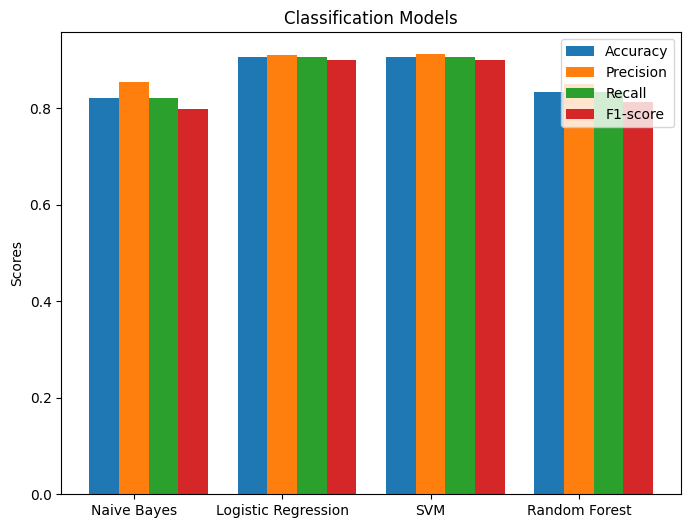

In [41]:
plt.figure(figsize=(8,6))

N = 4
ind = np.arange(N)
w = 0.2

plt.bar(ind, df['Accuracy'], label='Accuracy', width=w)
plt.bar(ind+w, df['Precision'], label='Precision', width=w)
plt.bar(ind+w*2, df['Recall'], label='Recall', width=w)
plt.bar(ind+w*3, df['F1-score'], label='F1-score', width=w)

plt.ylabel('Scores')

plt.xticks(ind+w,['Naive Bayes', 'Logistic Regression', 'SVM', 'Random Forest'])

plt.title('Classification Models')
plt.legend()


plt.show()